In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn

import warnings
warnings = warnings.filterwarnings('ignore')

In [97]:
# importing the dataset
mldata = pd.read_csv('ehresp_2015.csv')
mldata.head(5)

,TUCASEID,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,...,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWGT,EUWIC,EXINCOME1
0,20150101150018,1,1,31.4,3,1,-1,50,0,0,...,1,2,1,2,-1,-1,2,161,2,0
1,20150101150053,1,2,25.7,3,3,-1,120,0,0,...,1,2,1,-1,1,2,2,195,-1,0
2,20150101150071,1,1,29.6,3,1,-1,50,-2,0,...,1,2,1,2,-1,-1,2,178,-1,0
3,20150101150146,1,3,23.4,3,2,5,95,30,0,...,1,2,1,1,1,4,2,132,-1,0
4,20150101150147,1,1,35.9,1,1,5,140,5,0,...,1,2,1,1,1,1,2,250,-1,0


In [98]:
mldata.columns

Index(['TUCASEID', 'TULINENO', 'EEINCOME1', 'ERBMI', 'ERHHCH', 'ERINCOME',
       'ERSPEMCH', 'ERTPREAT', 'ERTSEAT', 'ETHGT', 'ETWGT', 'EUDIETSODA',
       'EUDRINK', 'EUEAT', 'EUEXERCISE', 'EUEXFREQ', 'EUFASTFD', 'EUFASTFDFRQ',
       'EUFFYDAY', 'EUFDSIT', 'EUFINLWGT', 'EUSNAP', 'EUGENHTH', 'EUGROSHP',
       'EUHGT', 'EUINCLVL', 'EUINCOME2', 'EUMEAT', 'EUMILK', 'EUPRPMEL',
       'EUSODA', 'EUSTORES', 'EUSTREASON', 'EUTHERM', 'EUWGT', 'EUWIC',
       'EXINCOME1'],
      dtype='object')

In [99]:
mldata_subset = mldata[['ERBMI','ERINCOME','EUEXFREQ','EUFASTFDFRQ',]]

In [100]:
mldata_subset.head(5)

,ERBMI,ERINCOME,EUEXFREQ,EUFASTFDFRQ
0,31.4,1,5,-1
1,25.7,3,4,2
2,29.6,1,-1,2
3,23.4,2,6,1
4,35.9,1,-1,5


### Data dimension before removing negative values

In [101]:
mldata_subset.shape

(10626, 4)

### Cleaning negative values from the data set

In [102]:
mldata_subset = mldata_subset[(mldata_subset > 0).all(1)]

### Data dimension after removing the negative values

In [103]:
mldata_subset.shape

(3707, 4)

In [104]:
mldata_subset.isnull().sum()

ERBMI          0
ERINCOME       0
EUEXFREQ       0
EUFASTFDFRQ    0
dtype: int64

ERBMI             AxesSubplot(0.125,0.536818;0.352273x0.343182)
ERINCOME       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
EUEXFREQ             AxesSubplot(0.125,0.125;0.352273x0.343182)
EUFASTFDFRQ       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

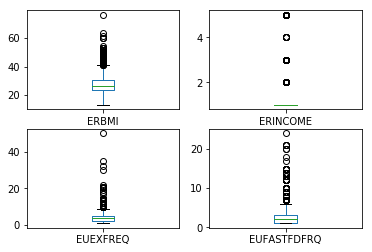

In [105]:
mldata_subset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(6, 4))

## outlier detection and removal

In [106]:
from scipy import stats

In [107]:
z = np.abs(stats.zscore(mldata_subset))
print(z)

[[0.29595332 0.91909067 0.04471828 0.30459034]
 [0.68308551 0.20437091 0.7245191  0.75951233]
 [0.78128407 0.51034886 2.26299387 0.75951233]
 ...
 [0.42781555 2.34853019 0.04471828 0.60525364]
 [0.09117887 0.51034886 0.33990041 1.06017563]
 [1.21891176 0.91909067 0.42933697 0.30459034]]


In [108]:
threshold = 2
print(np.where(z>2))

(array([   2,    4,    6,   16,   25,   31,   34,   36,   40,   49,   52,
         54,   57,   58,   59,   60,   68,   70,   72,   74,   83,   84,
         86,   89,  104,  105,  106,  111,  113,  116,  121,  130,  146,
        152,  156,  156,  160,  161,  174,  184,  195,  199,  203,  205,
        210,  212,  212,  216,  221,  221,  225,  229,  238,  240,  243,
        250,  254,  262,  266,  274,  276,  278,  286,  288,  294,  294,
        303,  305,  306,  307,  307,  309,  318,  323,  324,  328,  330,
        333,  336,  343,  347,  355,  357,  364,  368,  371,  382,  389,
        398,  399,  406,  409,  410,  418,  418,  423,  428,  431,  443,
        444,  446,  447,  459,  460,  467,  469,  479,  484,  485,  498,
        506,  507,  509,  509,  518,  519,  527,  527,  534,  535,  539,
        542,  550,  555,  557,  566,  580,  583,  585,  591,  595,  598,
        600,  603,  604,  609,  617,  622,  630,  635,  638,  640,  651,
        652,  654,  655,  656,  664,  667,  668,  

In [109]:
mldata_subset_no_outliers = mldata_subset[(z<2).all(axis=1)]

### Data dimension after removing outliers.

In [110]:
mldata_subset_no_outliers.shape

(2906, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED90184128>,
      dtype=object)

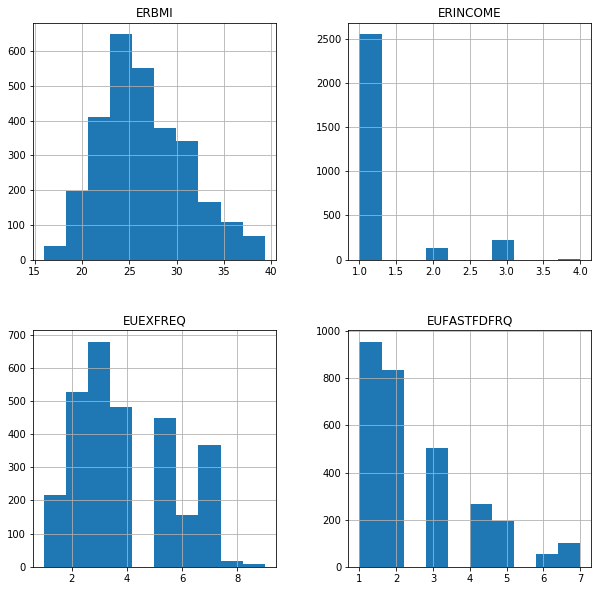

In [111]:
mldata_subset_no_outliers.hist(figsize = (10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED914EF240>,
      dtype=object)

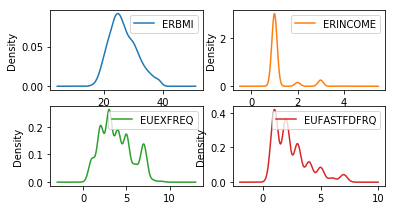

In [112]:
mldata_subset_no_outliers.plot(kind='density', subplots=True, layout=(3,2), sharex=False, figsize=(6, 5))

ERBMI             AxesSubplot(0.125,0.657941;0.352273x0.222059)
ERINCOME       AxesSubplot(0.547727,0.657941;0.352273x0.222059)
EUEXFREQ          AxesSubplot(0.125,0.391471;0.352273x0.222059)
EUFASTFDFRQ    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

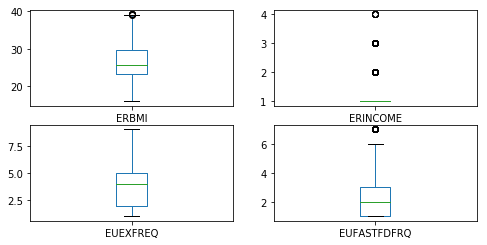

In [113]:
mldata_subset_no_outliers.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(8, 6))

## creating an overweight indicator variable

In [114]:
mldata_subset_no_outliers['OVERWEIGHT'] = np.where(mldata_subset_no_outliers.ERBMI > 25.0, 1, 0)

In [115]:
mldata_subset_no_outliers.head(5)

,ERBMI,ERINCOME,EUEXFREQ,EUFASTFDFRQ,OVERWEIGHT
1,25.7,3,4,2,1
3,23.4,2,6,1,0
7,33.9,1,4,1,1
9,22.6,1,7,3,0
18,29.3,1,2,2,1


In [116]:
cols = list(mldata_subset_no_outliers)
cols[0], cols[3] = cols[3], cols[0]
cols


['EUFASTFDFRQ', 'ERINCOME', 'EUEXFREQ', 'ERBMI', 'OVERWEIGHT']

In [117]:
mldata_subset_no_outliers.ix[:, cols]

,EUFASTFDFRQ,ERINCOME,EUEXFREQ,ERBMI,OVERWEIGHT
1,2,3,4,25.7,1
3,1,2,6,23.4,0
7,1,1,4,33.9,1
9,3,1,7,22.6,0
18,2,1,2,29.3,1
22,2,1,5,22.1,0
23,2,1,6,22.1,0
26,3,1,5,19.7,0
29,5,1,7,30.3,1
30,1,1,6,27.5,1


In [118]:
mldata_subset_no_outliers['OVERWEIGHT'].value_counts(normalize=True)

1    0.590158
0    0.409842
Name: OVERWEIGHT, dtype: float64

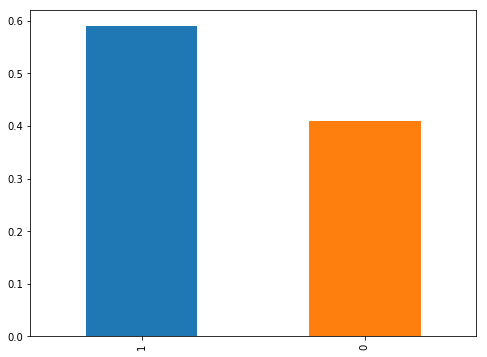

In [119]:
mldata_subset_no_outliers['OVERWEIGHT'].value_counts(normalize=True).plot.bar(figsize=(8, 6))

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## regression model

In [121]:
X = mldata_subset_no_outliers.drop(mldata_subset_no_outliers[['ERBMI', 'OVERWEIGHT']], 1)
y1 = mldata_subset_no_outliers.ERBMI
y2 = mldata_subset_no_outliers.OVERWEIGHT

In [122]:
kfold = KFold(n_splits=10, random_state=8)
Multiple_linReg_model = LinearRegression()
results = cross_val_score(Multiple_linReg_model, X, y1, cv=kfold)
print('R-squared mean of the multiple regression model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results.mean(), results.std()))

R-squared mean of the multiple regression model is: 0.006 and its mean standard deviation is: 0.008


In [123]:
KNN_regressor = KNeighborsRegressor()
results1 = cross_val_score(KNN_regressor, X, y1, cv=kfold)
print('R-squared mean of the KNN Rgressor model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results1.mean(), results1.std()))

R-squared mean of the KNN Rgressor model is: -0.183 and its mean standard deviation is: 0.057


In [124]:
decision_tree_model = DecisionTreeRegressor()
results1a = cross_val_score(decision_tree_model, X, y1, cv=kfold, scoring='r2')
print('R-squared mean of the model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results1a.mean(), results1a.std()))

R-squared mean of the model is: -0.039 and its mean standard deviation is: 0.032


In [125]:
svr_model = SVR()
results1b = cross_val_score(svr_model, X, y1, cv=kfold, scoring='r2')
print('R-squared mean of the model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results1b.mean(), results1b.std()))

R-squared mean of the model is: -0.019 and its mean standard deviation is: 0.019


## classification

In [127]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
results3 = cross_val_score(KNN_classifier, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the KNN model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results3.mean(), results3.std()))

accuracy of the KNN model is: 0.544 and its mean standard deviation is: 0.034


In [128]:
naive_model = GaussianNB()
results4 = cross_val_score(naive_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the naive bayes model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4.mean(), results4.std()))

accuracy of the naive bayes model is: 0.578 and its mean standard deviation is: 0.026


In [129]:
decision_tree_cls = DecisionTreeClassifier()
results4a = cross_val_score(decision_tree_cls, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the decision tree classifier model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4a.mean(), results4a.std()))

accuracy of the decision tree classifier model is: 0.579 and its mean standard deviation is: 0.027


In [130]:
svc_model = SVC()
results4c = cross_val_score(svc_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the support vector mschine model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4c.mean(), results4c.std()))

accuracy of the support vector mschine model is: 0.584 and its mean standard deviation is: 0.030


In [131]:
RF_classifier = RandomForestClassifier()
results4c = cross_val_score(RF_classifier, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the random forest model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4c.mean(), results4c.std()))

accuracy of the random forest model is: 0.580 and its mean standard deviation is: 0.025


In [132]:
from sklearn.ensemble import AdaBoostClassifier


In [133]:
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=8)
results4d = cross_val_score(adaboost_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the Adda boost model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4d.mean(), results4d.std()))

accuracy of the Adda boost model is: 0.592 and its mean standard deviation is: 0.024


In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
GradientBoosting_model = GradientBoostingClassifier(n_estimators=50, random_state=8)
results4e = cross_val_score(GradientBoosting_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the stochastic gradient boost model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4e.mean(), results4e.std()))

accuracy of the stochastic gradient boost model is: 0.583 and its mean standard deviation is: 0.031


In [136]:
Logit_model = LogisticRegression()
results2 = cross_val_score(Logit_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the logistic model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results2.mean(), results2.std()))

accuracy of the logistic model is: 0.585 and its mean standard deviation is: 0.028
